In [17]:
# https://github.com/tim-hilt/vlad
# git clone the above and python -m pip install -e .

import os
import sys
from pathlib import Path
import numpy as np
from numpy.linalg import norm
import cv2
import matplotlib.pyplot as plt
import progressbar as pb
from joblib import load, dump
from vlad import VLAD
import os

In [18]:
test_img = 'left_1713973888769101483.png'

# For all .png files in /home/yujustin/HDD2/grocery_store/lerf_data_2024_04_24/side_facing_images_downsample/left/, 
# extract features and save to /home/yujustin/HDD2/grocery_store/lerf_data_2024_04_24/side_facing_images_downsample/left_features/
directory = '/home/yujustin/HDD2/grocery_store/lerf_data_2024_04_24/side_facing_images_downsample/left/'
 
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        if os.path.join(directory, filename) == os.path.join(directory, test_img):
            print('skipping test img')
            continue
        # print(f)



skipping test img


In [19]:
query_path = Path('/home/yujustin/HDD2/grocery_store/query/')
db_path = Path('/home/yujustin/HDD2/grocery_store/db')

In [20]:
query_files = sorted([x for x in query_path.iterdir() if x.is_file()], key=lambda x: int(x.name.split('_')[-1].split('.')[0]))
db_files = sorted([x for x in db_path.iterdir() if x.is_file()], key=lambda x: int(x.name.split('_')[-1].split('.')[0]))

In [21]:
_nfeatures = 1000
sift = cv2.SIFT_create(_nfeatures)

In [22]:
def RootSIFT(descs):
    if isinstance(descs, list):
        for i in range(len(descs)):
            descs[i] = np.sqrt(descs[i] / norm(descs[i], ord=1, axis=1)[:,np.newaxis])
    elif isinstance(descs, np.ndarray):
        descs = np.sqrt(descs / norm(descs, ord=1, axis=1)[:,np.newaxis])  # New axis in order to broadcast correctly
    else:
        print("{} not supported! Choose one of [list, numpy.ndarray].".format(type(descs)))
        return
    return descs

In [23]:
DB_TENSOR_SIFT = Path(f"RS-{_nfeatures}-nomask-globaleq-db.joblib")

if not DB_TENSOR_SIFT.exists():
    db_descs = []
    for file in pb.progressbar(db_files):
        img = cv2.imread(str(file), 0)
        img = cv2.equalizeHist(img)
        _, descs = sift.detectAndCompute(img, None)
        db_descs.append(descs[:_nfeatures])

    db_descs = RootSIFT(db_descs)
    dump(db_descs, DB_TENSOR_SIFT)
else:
    db_descs = load(DB_TENSOR_SIFT)

  0% (0 of 663) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:55
  0% (2 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:35
  0% (3 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:28
  0% (4 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:25
  0% (5 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:23
  0% (6 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:22
  1% (7 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:20
  1% (8 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:01:19
  1% (9 of 663) |                        | Elapsed Time: 0:00:01 ETA:   0:01:18
  1% (10 of 663) |                       | Elapsed Time: 0:00:01 ETA:   0:01:17
  1% (11 of 663) |                       | Elapsed Time: 0:00:01 ETA:   0:01:17
  1% (12 of 663) |                      

In [24]:
QUERY_TENSOR_SIFT = Path(f"RS-{_nfeatures}-nomask-globaleq-query.joblib")

if not QUERY_TENSOR_SIFT.exists():
    query_descs = []
    for file in pb.progressbar(query_files):
        img = cv2.imread(str(file), 0)
        img = cv2.equalizeHist(img)
        _, descs = sift.detectAndCompute(img, None)
        query_descs.append(descs[:_nfeatures])

    query_descs = RootSIFT(query_descs)
    dump(query_descs, QUERY_TENSOR_SIFT)
else:
    query_descs = load(QUERY_TENSOR_SIFT)

  0% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (1 of 1) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [25]:
vlad = VLAD(k=256, n_vocabs=1, norming="RN", lcs=True).fit(db_descs)

Training vocab #1
Training KMeans...
Finding rotation-matrices...


  0% (0 of 663) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (2 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:00:33
  0% (5 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:00:31
  1% (8 of 663) |                        | Elapsed Time: 0:00:00 ETA:   0:00:30
  1% (11 of 663) |                       | Elapsed Time: 0:00:00 ETA:   0:00:30
  2% (14 of 663) |                       | Elapsed Time: 0:00:00 ETA:   0:00:30
  2% (17 of 663) |                       | Elapsed Time: 0:00:00 ETA:   0:00:29
  3% (20 of 663) |                       | Elapsed Time: 0:00:00 ETA:   0:00:29
  3% (23 of 663) |                       | Elapsed Time: 0:00:01 ETA:   0:00:29
  3% (26 of 663) |                       | Elapsed Time: 0:00:01 ETA:   0:00:29
  4% (29 of 663) |#                      | Elapsed Time: 0:00:01 ETA:   0:00:29
  4% (32 of 663) |#                      | Elapsed Time: 0:00:01 ETA:   0:00:28
  5% (34 of 663) |#                     

In [26]:
scores = np.zeros((len(query_descs), vlad.database.shape[0]))

for i in pb.progressbar(range(len(scores))):
    scores[i] = vlad.predict_proba(query_descs[i])

  0% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (1 of 1) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [27]:
(np.argmax(scores, axis=1) != np.delete(np.arange(1000), 92)).sum()  # Count number of false classifications

998

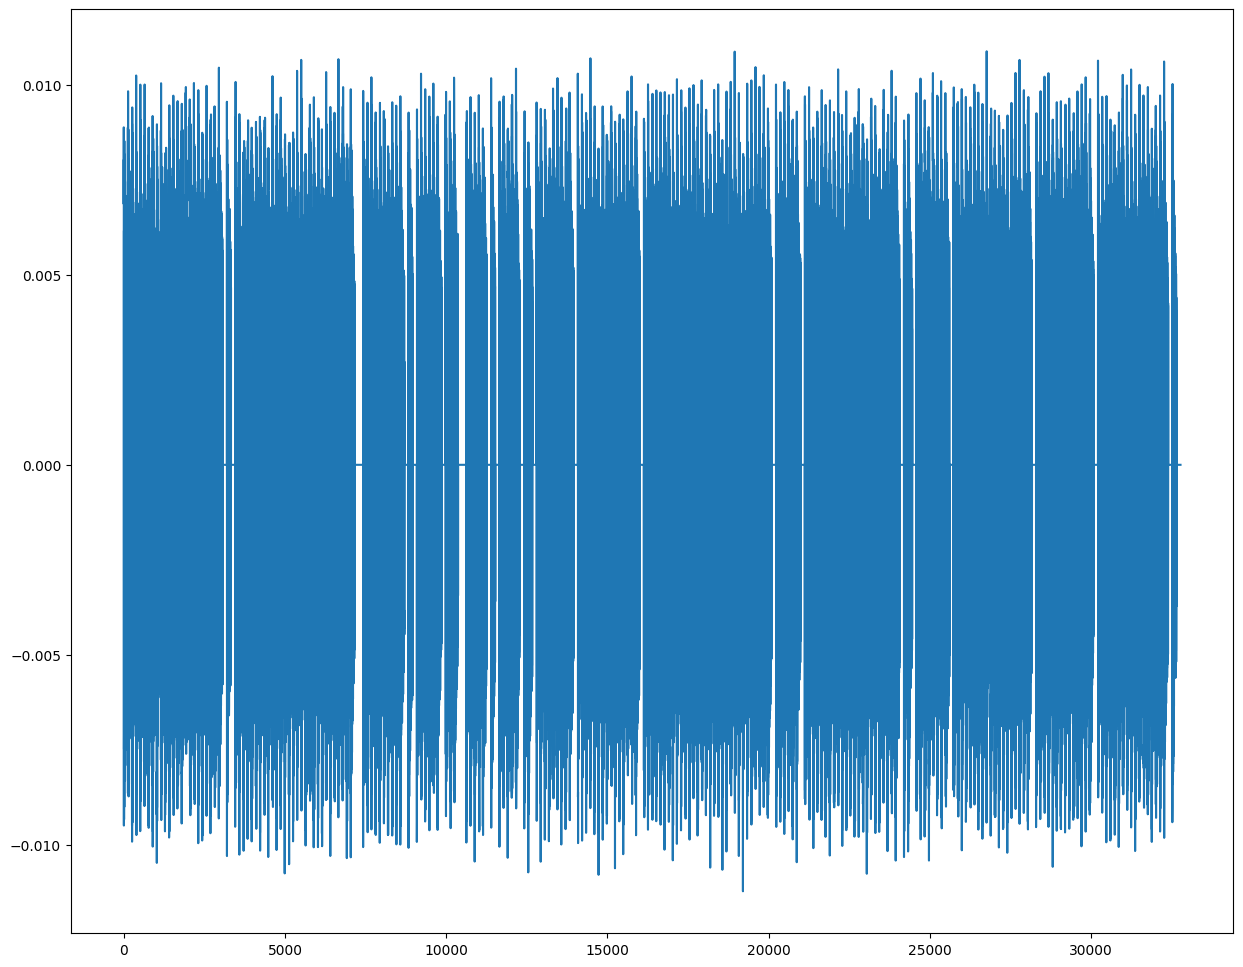

In [29]:
plt.figure(figsize=(15,12))
plt.plot(vlad.database[0]);

In [37]:
closest_vlad = np.argmax(scores, axis=1)
closest_file = db_files[closest_vlad.item()]
query_file = query_files[0]

/tmp/ipykernel_192011/1311638765.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


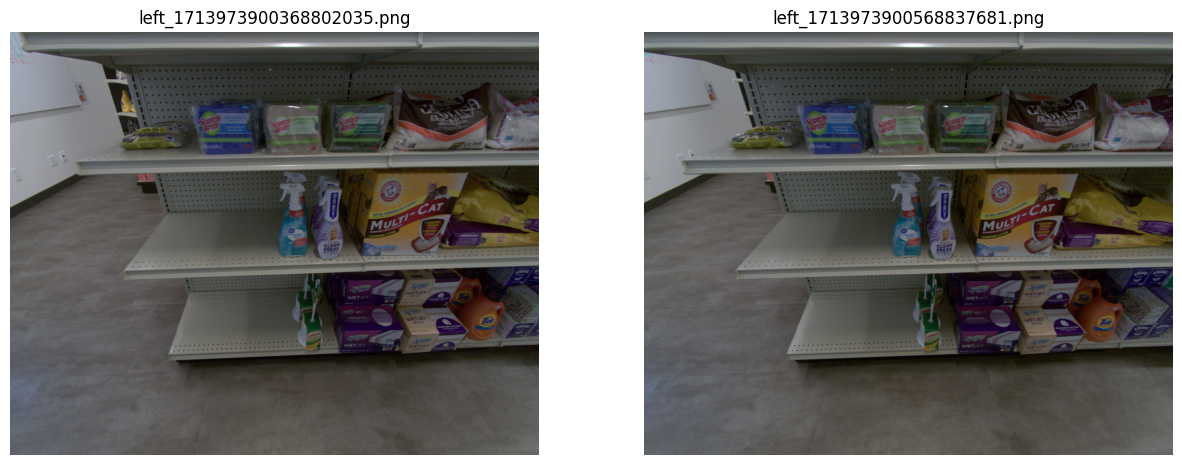

In [39]:

from PIL import Image
im_frame1 = Image.open(closest_file)
np_frame1 = np.array(im_frame1)
im_frame2 = Image.open(query_file)
np_frame2 = np.array(im_frame2)

f, axarr = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(15)
axarr[0].imshow(np_frame1)
axarr[1].imshow(np_frame2)
axarr[0].axis('off')
axarr[1].axis('off')
axarr[0].set_title(closest_file.name)
axarr[1].set_title(query_file.name)
f.show()